In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import shap

In [5]:
data = pd.read_csv("2525_trainingdata.csv")
data.head()
# print(data.index)

,SBP,DBP,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
0,136.00,94.33,-42.6,399.8,370.2,57.8,219.4,93.0,71.3,60.7,...,24.1,2.4,0.4,1.6,4.0,0.0,2.0,0.0,0.0,1.6
1,154.33,103.33,-42.6,399.8,370.2,57.8,219.4,93.0,71.3,60.7,...,24.1,2.4,0.4,1.6,4.0,0.0,2.0,0.0,0.0,1.6
2,143.75,100.00,-45.0,397.1,369.4,57.0,219.4,93.0,74.3,59.0,...,0.0,0.0,0.0,1.0,4.0,0.0,2.0,0.0,0.0,1.0
3,125.67,93.67,-45.0,397.1,369.4,57.0,219.4,93.0,74.3,59.0,...,0.0,0.0,0.0,1.0,4.0,0.0,2.0,0.0,0.0,1.0
4,142.67,97.00,-42.6,399.8,370.2,57.8,219.4,93.0,71.3,60.7,...,24.1,2.4,0.4,1.6,4.0,0.0,2.0,0.0,0.0,1.6


In [6]:
# label is SBP
y = data.SBP

# drop SBP/DBP - not features
X = data.drop(columns=["DBP", "SBP"])
X_features = list(X.columns)
print("# features:", len(X_features))

print(X_features)
print(y)
X

# features: 58
['bedTime_24', 'upTime_24', 'minutesAsleep_24', 'deep_24', 'light_24', 'rem_24', 'wake_24', 'sleepHR_24', 'sleepHRstd_24', 'steps_24', 'speed_24', 'sedentary_24', 'lightly_active_24', 'fairly_active_24', 'very_active_24', 'maxActiveHR_24', 'meanActiveHR_24', 'sed_minutes_24', 'fatburn_minutes_24', 'cardio_minutes_24', 'peak_minutes_24', 'rhr_24', 'stress_24', 'mood_24', 'alcohol_24', 'red_meat_24', 'fruit_24', 'vegetable_24', 'salt_24', 'bedTime_ewma', 'upTime_ewma', 'minutesAsleep_ewma', 'deep_ewma', 'light_ewma', 'rem_ewma', 'wake_ewma', 'sleepHR_ewma', 'sleepHRstd_ewma', 'steps_ewma', 'sedentary_ewma', 'lightly_active_ewma', 'fairly_active_ewma', 'very_active_ewma', 'speed_ewma', 'maxActiveHR_ewma', 'meanActiveHR_ewma', 'rhr_ewma', 'sed_minutes_ewma', 'fatburn_minutes_ewma', 'cardio_minutes_ewma', 'peak_minutes_ewma', 'stress_ewma', 'mood_ewma', 'alcohol_ewma', 'red_meat_ewma', 'fruit_ewma', 'vegetable_ewma', 'salt_ewma']
0      136.00
1      154.33
2      143.75
3   

,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,sleepHRstd_24,steps_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
0,-42.6,399.8,370.2,57.8,219.4,93.0,71.3,60.7,4.5,5921.5,...,24.1,2.4,0.4,1.6,4.0,0.0,2.0,0.0,0.0,1.6
1,-42.6,399.8,370.2,57.8,219.4,93.0,71.3,60.7,4.5,5921.5,...,24.1,2.4,0.4,1.6,4.0,0.0,2.0,0.0,0.0,1.6
2,-45.0,397.1,369.4,57.0,219.4,93.0,74.3,59.0,6.1,5856.7,...,0.0,0.0,0.0,1.0,4.0,0.0,2.0,0.0,0.0,1.0
3,-45.0,397.1,369.4,57.0,219.4,93.0,74.3,59.0,6.1,5856.7,...,0.0,0.0,0.0,1.0,4.0,0.0,2.0,0.0,0.0,1.0
4,-42.6,399.8,370.2,57.8,219.4,93.0,71.3,60.7,4.5,5921.5,...,24.1,2.4,0.4,1.6,4.0,0.0,2.0,0.0,0.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,-15.0,455.0,420.0,70.0,228.0,122.0,50.0,56.0,2.8,6159.0,...,48.7,7.8,0.1,1.8,4.0,0.0,1.3,1.6,3.0,0.8
224,-15.0,455.0,420.0,70.0,228.0,122.0,50.0,56.0,2.8,8433.0,...,48.7,7.8,0.1,1.8,4.0,0.0,1.3,1.6,3.0,0.8
225,154.0,600.0,381.0,47.0,254.0,80.0,65.0,59.0,5.7,2584.0,...,47.4,6.3,0.1,1.6,4.0,0.0,1.8,0.9,1.6,1.6
226,154.0,600.0,381.0,47.0,254.0,80.0,65.0,59.0,5.7,3230.0,...,47.4,6.3,0.1,1.7,4.0,0.0,1.4,1.7,3.4,1.3


In [7]:
# define model parameters 
max_depth = [int(x) for x in np.linspace(2, 30, 15)]
max_depth.append(None)
param = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
            'max_features': [0.33, 'sqrt', 0.5],
            'max_depth': max_depth,
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]}

model = RandomForestRegressor(n_estimators = 500,  n_jobs = -1)

In [8]:
# hyperparameter tuning
rf_randomCV = RandomizedSearchCV(estimator=model, param_distributions=param, cv=5, verbose=2,
                                   random_state=41, n_jobs=-1, n_iter=50)
rf_randomCV.fit(X, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=500, n_jobs=-1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, 22, 24, 26,
                                                      28, 30, None],
                                        'max_features': [0.33, 'sqrt', 0.5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=41, verbose=2)

In [9]:
# fit best model
model = rf_randomCV.best_estimator_
model = model.fit(X, y)

y_pred = model.predict(X)
print(model)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=2000, n_jobs=-1)


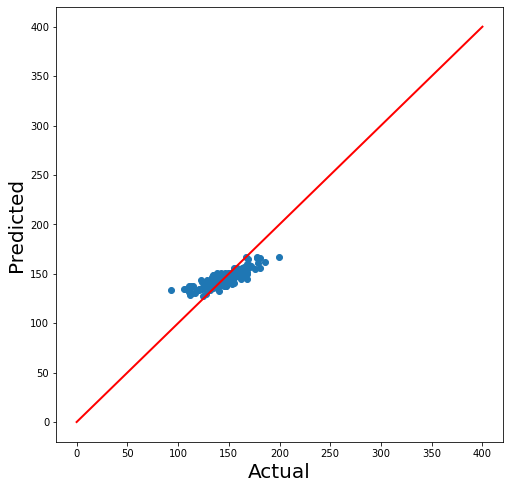

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(y,y_pred)
plt.plot([0, 400], [0, 400], color='r', linestyle='-', linewidth=2)

plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)

plt.show()

### Shapley Value Analysis
##### Reference - https://urldefense.proofpoint.com/v2/url?u=https-3A__christophm.github.io_interpretable-2Dml-2Dbook_shapley.html-255Cn&d=DwIG-g&c=-35OiAkTchMrZOngvJPOeA&r=oIy17wn5gPEUBrnG_66lPw&m=vmySaGRtrUcnDGBKJJknHSFpc-Z38aR7LwHSTCOP7PqEBLQsOOukbWNVsg65DQwC&s=PqGDkT1Hm0FGWq2tVMk68r6Q52eTk1TMNx0Ri8FT8KA&e= ##### Shap Documentation - https://urldefense.proofpoint.com/v2/url?u=https-3A__shap.readthedocs.io_en_latest_index.html-255Cn&d=DwIG-g&c=-35OiAkTchMrZOngvJPOeA&r=oIy17wn5gPEUBrnG_66lPw&m=vmySaGRtrUcnDGBKJJknHSFpc-Z38aR7LwHSTCOP7PqEBLQsOOukbWNVsg65DQwC&s=0muF3Apxb0muuHygX8Npbo860wsxt7--CVwg5fGfpd0&e= ##### Github - https://urldefense.proofpoint.com/v2/url?u=https-3A__github.com_slundberg_shap&d=DwIG-g&c=-35OiAkTchMrZOngvJPOeA&r=oIy17wn5gPEUBrnG_66lPw&m=vmySaGRtrUcnDGBKJJknHSFpc-Z38aR7LwHSTCOP7PqEBLQsOOukbWNVsg65DQwC&s=QLdJyquuZtH37z8rIyZKvHgjxcuj7oeoQdwZ-PpPPLE&e= 

In [11]:
explainer_1 = shap.Explainer(model, X)
shap_values_1 = explainer_1(X)

 99%|===================| 225/228 [00:28<00:00]        

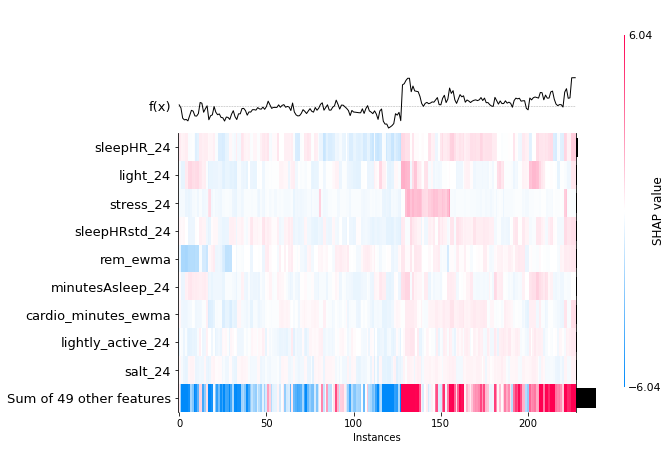

In [12]:
shap.plots.heatmap(shap_values_1)

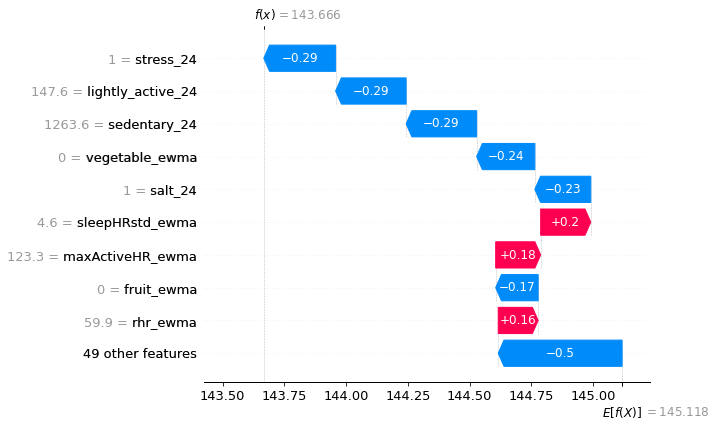

In [13]:
# Individual Data Sample Analysis
n = 0 # data sample number
shap.plots.waterfall(shap_values_1[n])

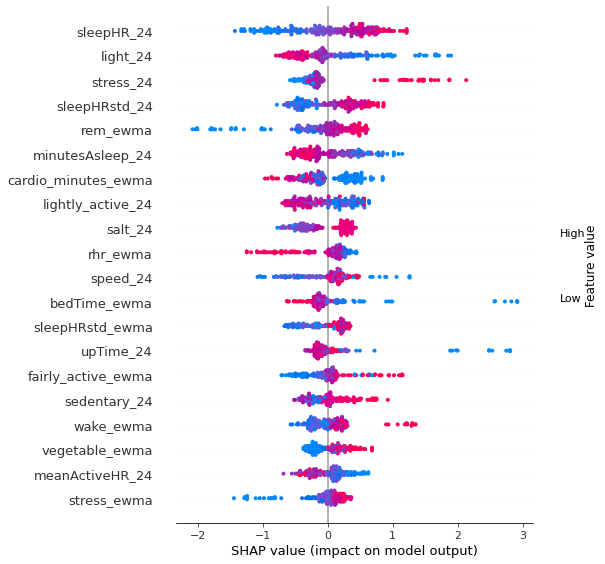

In [14]:
shap.summary_plot(shap_values_1)

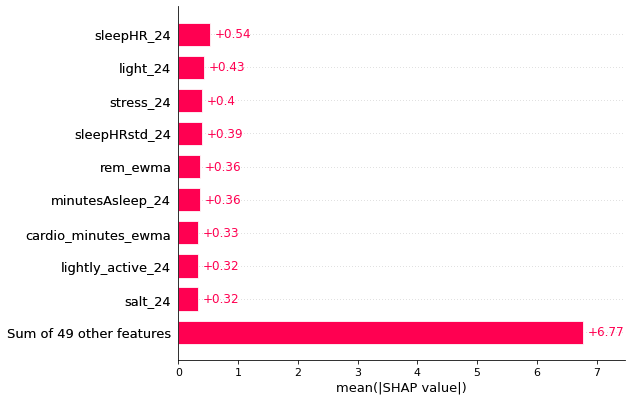

In [15]:
shap.plots.bar(shap_values_1)

In [16]:
explainer_2 = shap.Explainer(model, X)
shap_values_2 = explainer_2.shap_values(X)

 98%|===================| 223/228 [00:30<00:00]        

In [17]:
shap_df = pd.DataFrame(shap_values_2, index=X.index,columns=X.columns)
shap_df

,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,sleepHRstd_24,steps_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
0,0.072787,-0.150938,-0.136062,-0.101246,-0.084301,-0.042977,-0.098637,0.157239,0.106709,-0.024095,...,-0.098681,-0.121945,-0.026006,-0.025646,0.063500,0.0,-0.005384,-0.172080,-0.235827,0.008487
1,0.072787,-0.150938,-0.136062,-0.101246,-0.084301,-0.042977,-0.098637,0.157239,0.106709,-0.024095,...,-0.098681,-0.121945,-0.026006,-0.025646,0.063500,0.0,-0.005384,-0.172080,-0.235827,0.008487
2,0.003559,-0.170192,-0.202478,-0.172482,-0.189360,-0.076964,-0.173450,-0.327781,0.271092,-0.172020,...,-0.101978,0.281410,0.037166,-1.245938,0.059479,0.0,-0.060623,-0.218900,-0.295535,-0.514997
3,0.003559,-0.170192,-0.202478,-0.172482,-0.189360,-0.076964,-0.173450,-0.327781,0.271092,-0.172020,...,-0.101978,0.281410,0.037166,-1.245938,0.059479,0.0,-0.060623,-0.218900,-0.295535,-0.514997
4,0.070051,-0.152011,-0.142512,-0.104584,-0.087276,-0.043278,-0.103451,0.148994,0.106809,-0.030579,...,-0.098264,-0.123049,-0.023045,-0.023877,0.063886,0.0,-0.004967,-0.173388,-0.234244,0.003226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.139340,0.082394,-0.387345,-0.029791,-0.048890,0.112164,-0.059325,-0.741244,-0.316088,0.070626,...,0.250022,-0.452367,0.024983,0.073682,0.065608,0.0,-0.177442,0.135321,0.259255,-0.188659
224,0.140471,0.072938,-0.423406,-0.037874,-0.070301,0.100642,-0.059596,-0.786449,-0.297647,0.063482,...,0.219808,-0.494377,0.027019,0.070092,0.064476,0.0,-0.254451,0.110296,0.198185,-0.216882
225,0.106561,0.057403,-0.247923,-0.225669,-0.643912,-0.086575,-0.185037,-0.229785,0.417155,0.284289,...,0.119065,-0.545812,-0.011668,-0.058138,0.052906,0.0,0.008204,0.115828,0.139297,0.069433
226,0.098210,0.031258,-0.283346,-0.245679,-0.734074,-0.113587,-0.217335,-0.326300,0.358355,-0.197687,...,0.072857,-0.625568,-0.020751,-0.125852,0.048697,0.0,-0.498395,-0.146130,0.069408,-0.599397


(array([  0.5,   4.5,   8.5,  12.5,  16.5,  20.5,  24.5,  28.5,  32.5,
         36.5,  40.5,  44.5,  48.5,  52.5,  56.5,  60.5,  64.5,  68.5,
         72.5,  76.5,  80.5,  84.5,  88.5,  92.5,  96.5, 100.5, 104.5,
        108.5, 112.5, 116.5, 120.5, 124.5, 128.5, 132.5, 136.5, 140.5,
        144.5, 148.5, 152.5, 156.5, 160.5, 164.5, 168.5, 172.5, 176.5,
        180.5, 184.5, 188.5, 192.5, 196.5, 200.5, 204.5, 208.5, 212.5,
        216.5, 220.5, 224.5]),
 [Text(0, 0.5, '0'),
  Text(0, 4.5, '4'),
  Text(0, 8.5, '8'),
  Text(0, 12.5, '12'),
  Text(0, 16.5, '16'),
  Text(0, 20.5, '20'),
  Text(0, 24.5, '24'),
  Text(0, 28.5, '28'),
  Text(0, 32.5, '32'),
  Text(0, 36.5, '36'),
  Text(0, 40.5, '40'),
  Text(0, 44.5, '44'),
  Text(0, 48.5, '48'),
  Text(0, 52.5, '52'),
  Text(0, 56.5, '56'),
  Text(0, 60.5, '60'),
  Text(0, 64.5, '64'),
  Text(0, 68.5, '68'),
  Text(0, 72.5, '72'),
  Text(0, 76.5, '76'),
  Text(0, 80.5, '80'),
  Text(0, 84.5, '84'),
  Text(0, 88.5, '88'),
  Text(0, 92.5, '92'

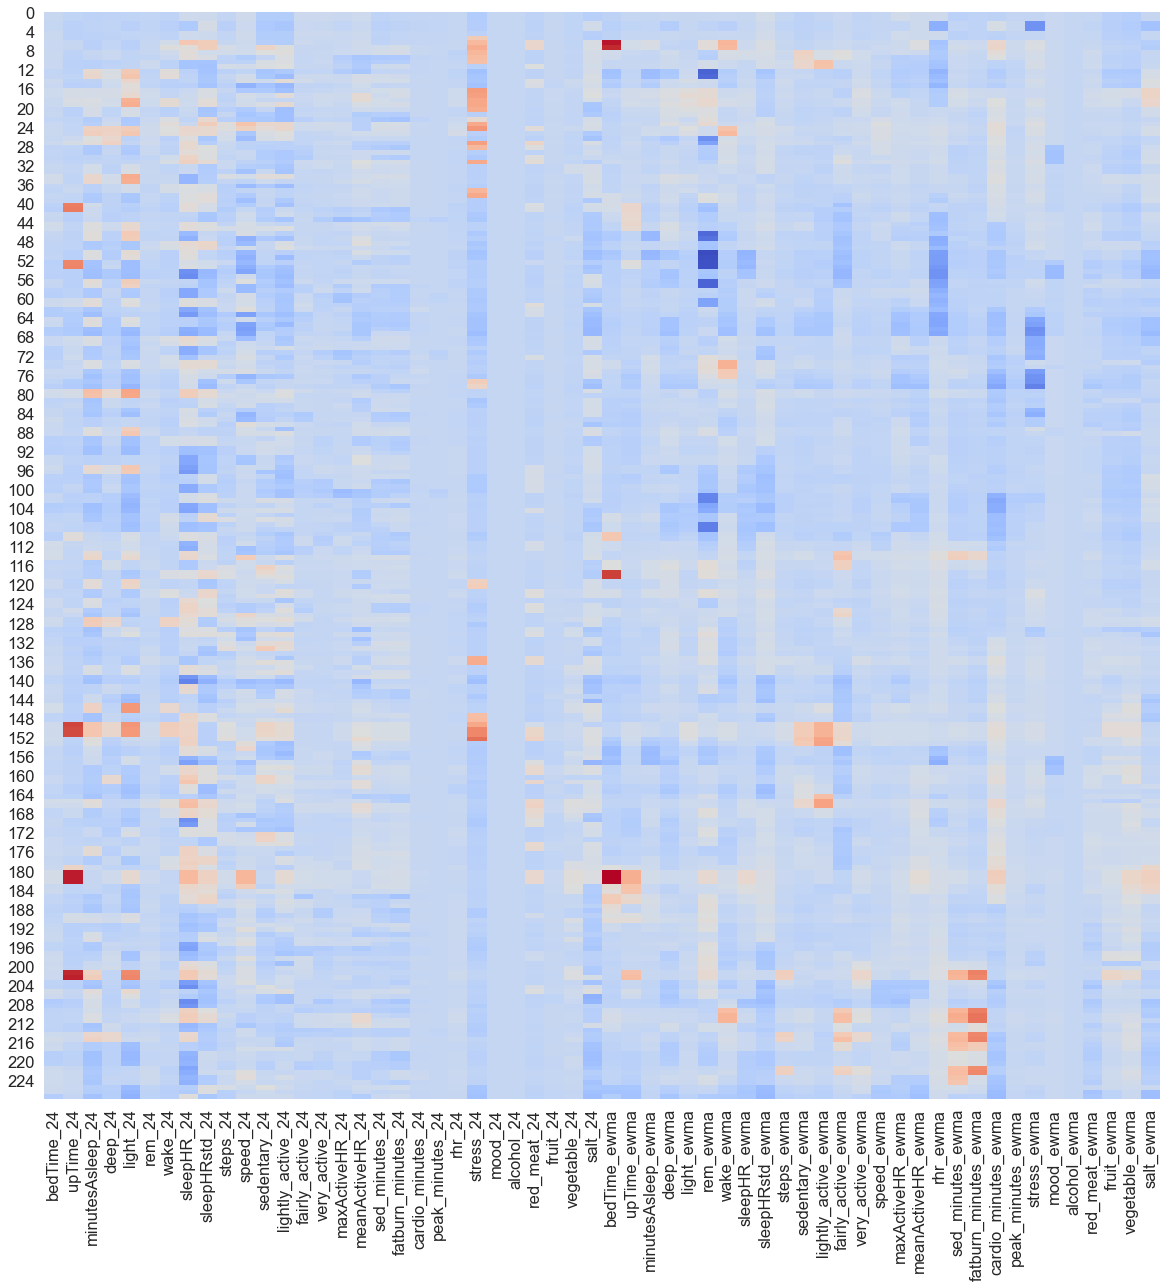

In [18]:
# import seaborn as sns
# # mean_shap = np.abs(shap_values_1).mean(0)
# df = pd.DataFrame(shap_df,index=X.index,columns=X.columns)
# df.where(df.values == np.diagonal(df),df.values*2,inplace=True)
# # df_new = df.iloc[0:10 , 0:10]
# plt.figure(figsize=(20, 20), facecolor='w', edgecolor='k')
# sns.set(font_scale=1.5)
# sns.heatmap(df,cmap='coolwarm',annot=False,fmt='.3g',cbar=False)
# plt.yticks(rotation=0) 

##### Other plots - https://urldefense.proofpoint.com/v2/url?u=https-3A__medium.com_dataman-2Din-2Dai_the-2Dshap-2Dwith-2Dmore-2Delegant-2Dcharts-2Dbc3e73fa1c0c&d=DwIG-g&c=-35OiAkTchMrZOngvJPOeA&r=oIy17wn5gPEUBrnG_66lPw&m=vmySaGRtrUcnDGBKJJknHSFpc-Z38aR7LwHSTCOP7PqEBLQsOOukbWNVsg65DQwC&s=dstABq2hu7yoI88q9YsWER0R6FyyicTK2QEqYKIKMPc&e= 

### Shapley Interactions
##### https://urldefense.proofpoint.com/v2/url?u=https-3A__medium.com_p_8c4a2bc11c2a&d=DwIG-g&c=-35OiAkTchMrZOngvJPOeA&r=oIy17wn5gPEUBrnG_66lPw&m=vmySaGRtrUcnDGBKJJknHSFpc-Z38aR7LwHSTCOP7PqEBLQsOOukbWNVsg65DQwC&s=bY5DvJtk81TcUrO9hH9FStD9vMSzl-OeG285LilJIok&e= 

In [19]:
explainer = shap.TreeExplainer(model)
shap_interaction = explainer.shap_interaction_values(X)
print(np.shape(shap_interaction))

(228, 58, 58)


In [20]:
# SHAP interaction values for one data sample
df_si = pd.DataFrame(shap_interaction[0],index=X.columns,columns=X.columns)
df_si

,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,sleepHRstd_24,steps_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
bedTime_24,0.054861,-0.000324,-0.002781,-0.000685,-0.001374,0.001169,0.000064,0.000251,-0.000070,3.696297e-04,...,0.001028,0.003264,-5.171272e-04,0.000995,0.000082,0.0,0.001398,0.000109,0.000132,-0.001186
upTime_24,-0.000324,-0.231608,0.001570,-0.001316,0.004214,0.002666,0.000449,-0.003150,-0.006689,-1.161089e-03,...,0.003314,0.002901,2.437051e-03,-0.000870,-0.000514,0.0,-0.000562,0.002884,0.001792,0.000761
minutesAsleep_24,-0.002781,0.001570,-0.104166,0.001301,0.000227,-0.001929,-0.001106,-0.006710,-0.003179,-1.308309e-04,...,-0.001312,0.001591,-6.448296e-04,0.001041,-0.000278,0.0,-0.000662,0.005789,-0.000784,0.001970
deep_24,-0.000685,-0.001316,0.001301,-0.101299,-0.001784,0.002158,0.000339,0.001789,-0.001396,6.233651e-04,...,0.000220,0.003707,1.975188e-04,0.002435,-0.000356,0.0,0.000099,0.001562,0.002911,0.000064
light_24,-0.001374,0.004214,0.000227,-0.001784,-0.105159,-0.001332,-0.000699,-0.007113,0.000532,4.395478e-04,...,-0.000700,0.009616,5.715427e-03,-0.000997,-0.000052,0.0,-0.001875,0.006200,0.010354,-0.003014
rem_24,0.001169,0.002666,-0.001929,0.002158,-0.001332,-0.052291,0.000640,-0.000680,0.000268,-2.236802e-03,...,-0.001463,0.003941,5.917187e-04,0.000132,-0.000648,0.0,0.000735,0.002107,0.000116,-0.001376
wake_24,0.000064,0.000449,-0.001106,0.000339,-0.000699,0.000640,-0.146263,0.002187,0.005477,2.551989e-03,...,0.003203,0.006931,2.561283e-03,0.002591,0.000712,0.0,-0.000253,0.001369,0.000462,0.002172
sleepHR_24,0.000251,-0.003150,-0.006710,0.001789,-0.007113,-0.000680,0.002187,0.148872,0.002844,-2.834785e-03,...,-0.000980,0.008462,3.932260e-03,0.003461,0.000317,0.0,0.002685,-0.002638,-0.000288,-0.002346
sleepHRstd_24,-0.000070,-0.006689,-0.003179,-0.001396,0.000532,0.000268,0.005477,0.002844,0.084697,1.127814e-03,...,-0.002868,-0.001089,2.647280e-03,0.000608,-0.001232,0.0,0.002050,0.001229,0.000199,0.001616
steps_24,0.000370,-0.001161,-0.000131,0.000623,0.000440,-0.002237,0.002552,-0.002835,0.001128,-7.439668e-02,...,0.002607,0.008155,4.904453e-07,0.001273,-0.000016,0.0,0.000964,-0.002093,-0.001812,-0.001502


In [36]:
# df_new = df_si.iloc[0:10 , 0:10]
# df_new

,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,sleepHRstd_24,steps_24
bedTime_24,0.058241,-0.002702,-0.003326,-0.000481,-0.001860,-0.000453,-0.004759,-0.002734,0.000255,0.000051
upTime_24,-0.002702,-0.261227,-0.000897,0.000182,0.003568,0.000917,0.002049,0.001387,0.000914,0.001042
minutesAsleep_24,-0.003326,-0.000897,-0.153191,0.001977,-0.000515,0.000452,-0.000758,0.003342,-0.000700,0.003036
deep_24,-0.000481,0.000182,0.001977,-0.087632,-0.001044,0.000095,-0.000958,0.004092,-0.001585,0.004087
light_24,-0.001860,0.003568,-0.000515,-0.001044,-0.083283,-0.001760,-0.002595,-0.002842,0.001312,0.005077
rem_24,-0.000453,0.000917,0.000452,0.000095,-0.001760,-0.048601,0.001590,-0.001654,0.002530,-0.000250
wake_24,-0.004759,0.002049,-0.000758,-0.000958,-0.002595,0.001590,-0.146572,0.003159,0.005112,0.003251
sleepHR_24,-0.002734,0.001387,0.003342,0.004092,-0.002842,-0.001654,0.003159,0.209329,-0.001323,0.000795
sleepHRstd_24,0.000255,0.000914,-0.000700,-0.001585,0.001312,0.002530,0.005112,-0.001323,0.089739,0.004284
steps_24,0.000051,0.001042,0.003036,0.004087,0.005077,-0.000250,0.003251,0.000795,0.004284,-0.044518


In [21]:
#get the model prediction#
y_pred = model.predict(X)


In [22]:
#calculate the mean prediction#
mean_pred = np.mean(y_pred)
print(mean_pred)

145.04138763502868


In [23]:
sum_shap = np.sum(shap_interaction[0])
print("Model prediction: {}".format(y_pred[0]))
print("Mean prediction + interaction values: {}".format(mean_pred+sum_shap))

Model prediction: 143.66726890089421
Mean prediction + interaction values: 143.69396565872955


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5,
        44.5, 46.5, 48.5, 50.5, 52.5, 54.5, 56.5]),
 [Text(0, 0.5, 'bedTime_24'),
  Text(0, 2.5, 'minutesAsleep_24'),
  Text(0, 4.5, 'light_24'),
  Text(0, 6.5, 'wake_24'),
  Text(0, 8.5, 'sleepHRstd_24'),
  Text(0, 10.5, 'speed_24'),
  Text(0, 12.5, 'lightly_active_24'),
  Text(0, 14.5, 'very_active_24'),
  Text(0, 16.5, 'meanActiveHR_24'),
  Text(0, 18.5, 'fatburn_minutes_24'),
  Text(0, 20.5, 'peak_minutes_24'),
  Text(0, 22.5, 'stress_24'),
  Text(0, 24.5, 'alcohol_24'),
  Text(0, 26.5, 'fruit_24'),
  Text(0, 28.5, 'salt_24'),
  Text(0, 30.5, 'upTime_ewma'),
  Text(0, 32.5, 'deep_ewma'),
  Text(0, 34.5, 'rem_ewma'),
  Text(0, 36.5, 'sleepHR_ewma'),
  Text(0, 38.5, 'steps_ewma'),
  Text(0, 40.5, 'lightly_active_ewma'),
  Text(0, 42.5, 'very_active_ewma'),
  Text(0, 44.5, 'maxActiveHR_ewma'),
  Text(0, 46.5, 'rhr_ewma'),
  Text(0, 48.5, '

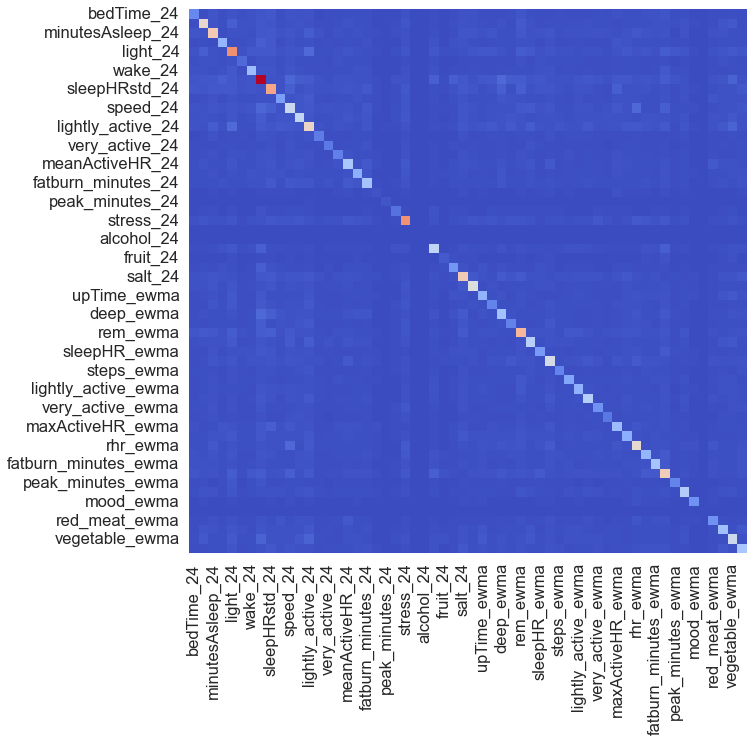

In [24]:
import seaborn as sns
mean_shap = np.abs(shap_interaction).mean(0)
df_1 = pd.DataFrame(mean_shap,index=X.columns,columns=X.columns)
df_1.where(df_1.values == np.diagonal(df_1),df_1.values*2,inplace=True)
# df_new = df_1.iloc[0:5, 0:5]
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(df_1,cmap='coolwarm',annot=False,fmt='.3g',cbar=False)
plt.yticks(rotation=0) 


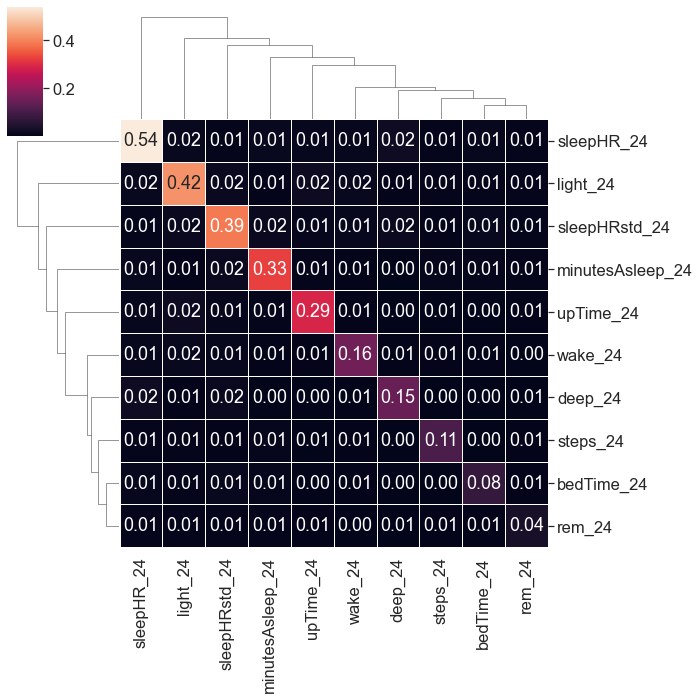

In [25]:
df_new = df_1.iloc[0:10, 0:10]
sns.clustermap(df_new,annot=True,fmt=".2f",linewidths=0.5)

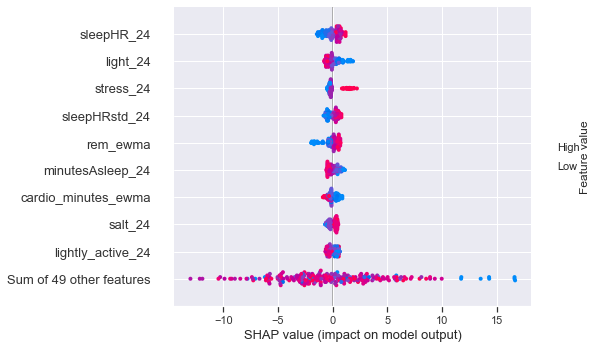

In [26]:
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)

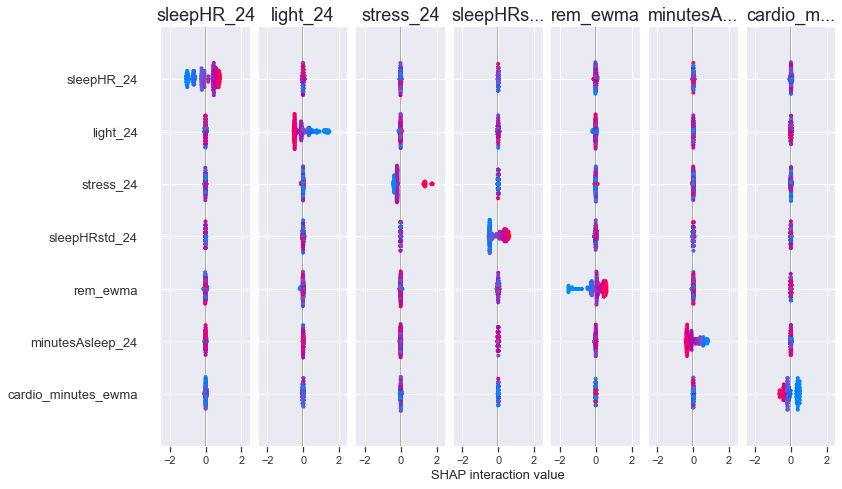

In [27]:
shap.summary_plot(shap_interaction, X)

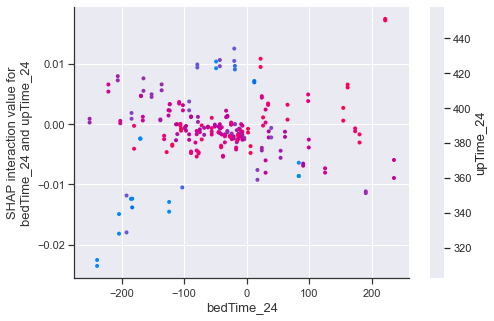

In [28]:
shap.dependence_plot(
    ("bedTime_24", "upTime_24"),
    shap_interaction, X,
    display_features=X)

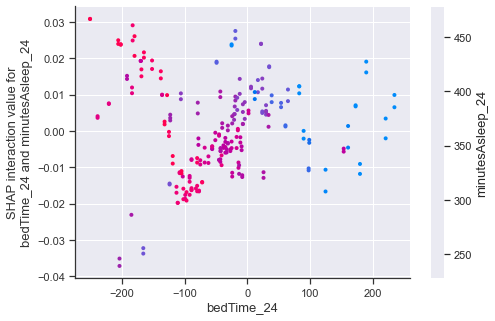

In [29]:
shap.dependence_plot(
    ("bedTime_24", "minutesAsleep_24"),
    shap_interaction, X,
    display_features=X)

In [30]:

df_si = pd.DataFrame(np.abs(shap_interaction[0]),index=X.columns,columns=X.columns)
df_si


,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,sleepHRstd_24,steps_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
bedTime_24,0.054861,0.000324,0.002781,0.000685,0.001374,0.001169,0.000064,0.000251,0.000070,3.696297e-04,...,0.001028,0.003264,5.171272e-04,0.000995,0.000082,0.0,0.001398,0.000109,0.000132,0.001186
upTime_24,0.000324,0.231608,0.001570,0.001316,0.004214,0.002666,0.000449,0.003150,0.006689,1.161089e-03,...,0.003314,0.002901,2.437051e-03,0.000870,0.000514,0.0,0.000562,0.002884,0.001792,0.000761
minutesAsleep_24,0.002781,0.001570,0.104166,0.001301,0.000227,0.001929,0.001106,0.006710,0.003179,1.308309e-04,...,0.001312,0.001591,6.448296e-04,0.001041,0.000278,0.0,0.000662,0.005789,0.000784,0.001970
deep_24,0.000685,0.001316,0.001301,0.101299,0.001784,0.002158,0.000339,0.001789,0.001396,6.233651e-04,...,0.000220,0.003707,1.975188e-04,0.002435,0.000356,0.0,0.000099,0.001562,0.002911,0.000064
light_24,0.001374,0.004214,0.000227,0.001784,0.105159,0.001332,0.000699,0.007113,0.000532,4.395478e-04,...,0.000700,0.009616,5.715427e-03,0.000997,0.000052,0.0,0.001875,0.006200,0.010354,0.003014
rem_24,0.001169,0.002666,0.001929,0.002158,0.001332,0.052291,0.000640,0.000680,0.000268,2.236802e-03,...,0.001463,0.003941,5.917187e-04,0.000132,0.000648,0.0,0.000735,0.002107,0.000116,0.001376
wake_24,0.000064,0.000449,0.001106,0.000339,0.000699,0.000640,0.146263,0.002187,0.005477,2.551989e-03,...,0.003203,0.006931,2.561283e-03,0.002591,0.000712,0.0,0.000253,0.001369,0.000462,0.002172
sleepHR_24,0.000251,0.003150,0.006710,0.001789,0.007113,0.000680,0.002187,0.148872,0.002844,2.834785e-03,...,0.000980,0.008462,3.932260e-03,0.003461,0.000317,0.0,0.002685,0.002638,0.000288,0.002346
sleepHRstd_24,0.000070,0.006689,0.003179,0.001396,0.000532,0.000268,0.005477,0.002844,0.084697,1.127814e-03,...,0.002868,0.001089,2.647280e-03,0.000608,0.001232,0.0,0.002050,0.001229,0.000199,0.001616
steps_24,0.000370,0.001161,0.000131,0.000623,0.000440,0.002237,0.002552,0.002835,0.001128,7.439668e-02,...,0.002607,0.008155,4.904453e-07,0.001273,0.000016,0.0,0.000964,0.002093,0.001812,0.001502


In [31]:
import numpy as np
arr = df_si.to_numpy()
arr

array([[5.48614549e-02, 3.24246792e-04, 2.78065436e-03, ...,
        1.08745597e-04, 1.32473366e-04, 1.18635529e-03],
       [3.24246792e-04, 2.31608318e-01, 1.56966401e-03, ...,
        2.88425181e-03, 1.79172184e-03, 7.60932898e-04],
       [2.78065436e-03, 1.56966401e-03, 1.04166289e-01, ...,
        5.78868397e-03, 7.84255253e-04, 1.96979722e-03],
       ...,
       [1.08745597e-04, 2.88425181e-03, 5.78868397e-03, ...,
        2.20307816e-01, 3.41652463e-03, 6.76481470e-03],
       [1.32473366e-04, 1.79172184e-03, 7.84255253e-04, ...,
        3.41652463e-03, 2.62366337e-01, 5.13391016e-03],
       [1.18635529e-03, 7.60932898e-04, 1.96979722e-03, ...,
        6.76481470e-03, 5.13391016e-03, 3.94504529e-03]])

In [32]:
diag = np.diagonal(arr)
diag

array([0.05486145, 0.23160832, 0.10416629, 0.10129915, 0.10515894,
       0.0522905 , 0.1462629 , 0.14887153, 0.08469668, 0.07439668,
       0.09753823, 0.30231243, 0.27596328, 0.09248861, 0.07540845,
       0.05960426, 0.03668444, 0.1431933 , 0.0295883 , 0.0180635 ,
       0.01289208, 0.02921373, 0.38253211, 0.        , 0.        ,
       0.15909382, 0.02035423, 0.09891336, 0.39029127, 0.1758686 ,
       0.03360582, 0.00849542, 0.03656175, 0.06238566, 0.04673592,
       0.0329084 , 0.02330175, 0.21011318, 0.05518275, 0.13513917,
       0.02935921, 0.04139678, 0.06022325, 0.02933336, 0.13936805,
       0.07948597, 0.18429012, 0.18966114, 0.15997552, 0.20080296,
       0.08954897, 0.00348517, 0.06460505, 0.        , 0.0110292 ,
       0.22030782, 0.26236634, 0.00394505])

In [33]:
trace = np.trace(arr)
trace

5.917230195932436

In [34]:
np.diag(df_si).mean()

0.10202121027469717

In [59]:
# df_si = pd.DataFrame(arr,index=X.columns,columns=X.columns)
# df_si

In [37]:
a = list()
a = {i: np.diag(df_si, i).mean() for i in range(-1*(df_si.shape[0]-1), df_si.shape[1])}
print(a)

{-57: 0.001186355291440483, -56: 0.0004467031318712597, -55: 0.0012900882185462703, -54: 0.0012825987928745779, -53: 0.002455105838461338, -52: 0.002339235431201316, -51: 0.0014421634178251933, -50: 0.0010569119570148125, -49: 0.0012342296766160972, -48: 0.0011653524012769229, -47: 0.0017310004891042208, -46: 0.0017359037741860074, -45: 0.0023681347479585333, -44: 0.002705160742250128, -43: 0.002108224132786731, -42: 0.001718802534154273, -41: 0.0008526538694430414, -40: 0.00212207995080981, -39: 0.0021039259275181786, -38: 0.0016153480518292704, -37: 0.0016845447207127406, -36: 0.0017125791958819093, -35: 0.001796530153104565, -34: 0.001919290038391594, -33: 0.0017010893670035088, -32: 0.0013353168415458892, -31: 0.0014061504564312666, -30: 0.0013756438586961064, -29: 0.001525919978514545, -28: 0.001461179647252702, -27: 0.0018902454880393989, -26: 0.0019683295344641062, -25: 0.0014364409082930495, -24: 0.0019620212760890886, -23: 0.001695262672357041, -22: 0.0015841547816926702, -21: